# Water Conservation Exploration
https://www.kaggle.com/calepa/water-conservation-supplier-compliance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading & Cleaning

In [2]:
# Loading the dataset for supplier compliance and print the columns
sc = pd.read_csv('supplier_compliance.csv', skipinitialspace=True)
sc.columns

Index(['Supplier Name', 'Hydrologic Region',
       'State-mandated Conservation Standard - Previous (3/1/2016)',
       'State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       'Did Supplier Self-certify?',
       'Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       'June 2016 to Aug 2016 Self-certified?',
       'Applicable Cumulative Savings by Supplier (as compared to 2013)',
       'Missed Conservation Standard By', 'Order Status',
       'Monthly Savings (as compared to 2013) - Aug 2015',
       'Monthly Savings (as compared to 2013) - Aug 2016',
       'Estimated Aug 2016 Monthly R-GPCD', 'Total Population Served'],
      dtype='object')

In [3]:
# Initial look at the dataset
sc.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,28%,28%,No,13.1%,18.0%,13.1%,14.9%,C,16.8%,20.5%,148.5,"14,120"
1,Yucaipa Valley Water District,South Coast,34%,20%,Yes,18.3%,7.1%,7.1%,12.9%,NaN,26.4%,11.9%,260.0,"45,018"
2,Sanger City of,Tulare Lake,26%,26%,No,17.3%,12.4%,17.3%,8.7%,NaN,38.0%,17.2%,181.1,"25,664"
3,Adelanto City of,South Lahontan,16%,16%,No,9.3%,-10.3%,9.3%,6.7%,C,20.5%,-30.6%,125.5,"29,023"
4,Red Bluff City of,Sacramento River,33%,33%,No,27.8%,19.5%,27.8%,5.2%,NaN,42.4%,30.8%,202.9,"14,076"


In [4]:
# Convert the string columns with percentage values to float columns and check the data types of all columns
sc.iloc[:,[2,3,5,6,7,8,10,11]] = sc.iloc[:,[2,3,5,6,7,8,10,11]].replace('%','',regex=True).apply(pd.to_numeric)/100
sc.iloc[:,13] = sc.iloc[:,13].replace(',','',regex=True).apply(pd.to_numeric)
sc.dtypes

Supplier Name                                                                         object
Hydrologic Region                                                                     object
State-mandated Conservation Standard - Previous (3/1/2016)                           float64
State-mandated Conservation Standard - Current (Effective 6/1/2016)                  float64
Did Supplier Self-certify?                                                            object
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    float64
June 2016 to Aug 2016 Self-certified?                                                float64
Applicable Cumulative Savings by Supplier (as compared to 2013)                      float64
Missed Conservation Standard By                                                      float64
Order Status                                                                          object
Monthly Savings (as compared to 2013) - Aug 2015                      

In [5]:
# Check the prepared dataset
sc.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076


In [6]:
# Basic statistics about the dataset
sc.describe(include = 'all')

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
count,389,389,389.000000,389.000000,389,389.000000,389.000000,389.000000,389.000000,7,389.000000,389.000000,389.000000,3.890000e+02
unique,389,10,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Sunnyvale City of,South Coast,NaN,NaN,Yes,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN
freq,1,171,NaN,NaN,361,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.217609,0.023136,NaN,0.242018,0.202856,0.204820,-0.181684,NaN,0.270414,0.180591,133.831877,9.065885e+04
std,NaN,NaN,0.079607,0.063861,NaN,0.068435,0.071208,0.070885,0.082255,NaN,0.089001,0.083947,68.239474,2.434458e+05
min,NaN,NaN,0.040000,0.000000,NaN,0.046000,-0.103000,-0.029000,-0.479000,NaN,-0.174000,-0.306000,35.400000,1.120000e+02
25%,NaN,NaN,0.160000,0.000000,NaN,0.199000,0.159000,0.160000,-0.227000,NaN,0.217000,0.137000,87.000000,2.049900e+04
50%,NaN,NaN,0.220000,0.000000,NaN,0.239000,0.201000,0.203000,-0.188000,NaN,0.274000,0.180000,118.300000,4.376700e+04
75%,NaN,NaN,0.280000,0.000000,NaN,0.281000,0.241000,0.243000,-0.144000,NaN,0.326000,0.223000,164.500000,9.120700e+04


## Data Exploration

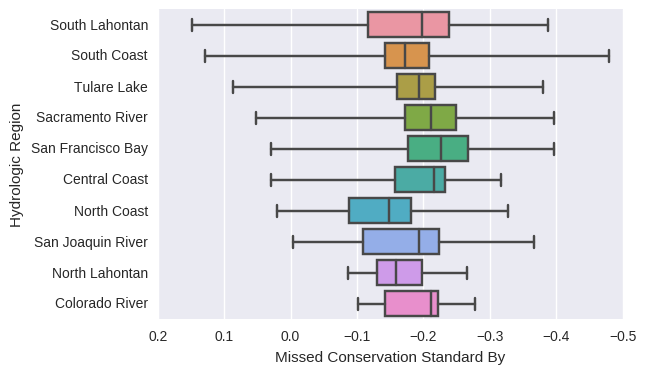

In [7]:
# Boxplots about how much the conservation standard was missed for each hydrologic region
ax = sns.boxplot(x='Missed Conservation Standard By', y='Hydrologic Region', data=sc, whis=np.inf)
# Invert the x-axis since a negative value for missed conservation is a good thing (means that they overperformed)
ax.invert_xaxis()

In [8]:
# Find the largest suppliers
sc.sort_values('Total Population Served', ascending=False).loc[:,['Supplier Name', 'Total Population Served']].head()

,Supplier Name,Total Population Served
91,Los Angeles Department of Water and Power,4061504
170,East Bay Municipal Utilities District,1400000
107,San Diego City of,1339958
338,San Jose Water Company,990000
69,San Francisco Public Utilities Commission,859276


/home/stefan/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


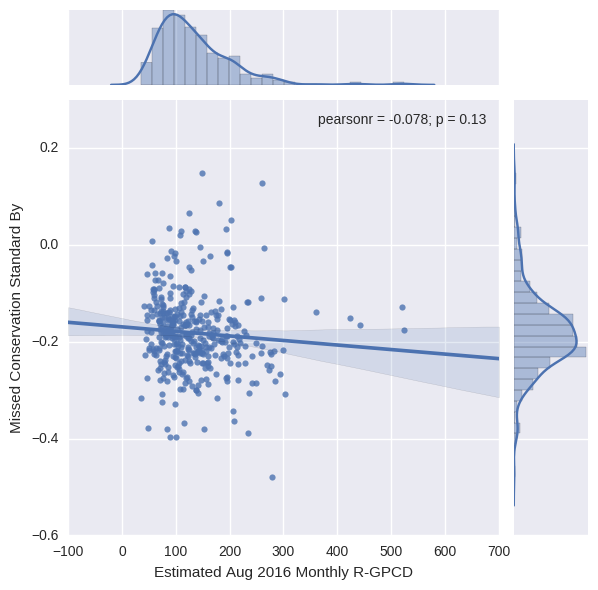

In [9]:
# Investigate on whether suppliers that have a higher consumption of residential gallons per capita per day
# are more likely to miss conservation standards (scatterplot & linear regression)
sns.jointplot('Estimated Aug 2016 Monthly R-GPCD', 'Missed Conservation Standard By', data=sc, kind='reg')

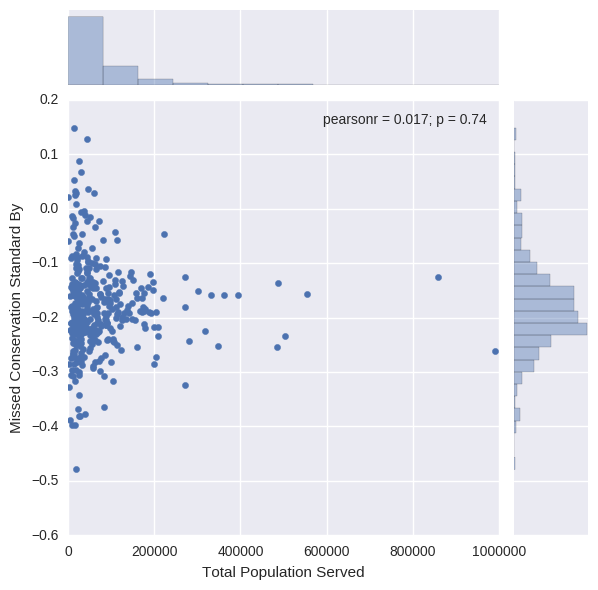

In [10]:
# Investigate on whether suppliers that serve a higher population are more likely to miss
# conservation standards (scatterplot & linear regression)
sns.jointplot('Total Population Served', 'Missed Conservation Standard By', data=sc, kind='scatter',
              xlim=(0,1000000))

In [11]:
# Number of suppliers per region
sc.groupby('Hydrologic Region')['Hydrologic Region'].count()

Hydrologic Region
Central Coast         32
Colorado River        11
North Coast           14
North Lahontan         4
Sacramento River      41
San Francisco Bay     44
San Joaquin River     26
South Coast          171
South Lahontan        17
Tulare Lake           29
Name: Hydrologic Region, dtype: int64